# **INAUGURAL PROJECT 2024: EXCHANGE ECONOMY**
By Anna Abildskov, Emma Knippel and Oscar Nyholm

# Table of contents
* [Setup](#toc0_)   

* [Question 1: Edgeworth Box](#toc1_) 

* [Question 2: Market Clearing Error](#toc2_)    

* [Question 3: Market Clearing Price](#toc3_)    

* [Question 4: A as Price Setter](#toc4_)   

* [Question 5: A as Market Maker](#toc5_) 

* [Question 6: Utalitarian Social Planner](#toc6_) 

* [Question 7: Random Draw](#toc7_) 

* [Question 8: Market Equilibrium](#toc8_) 



## <a id='toc0_'></a>[Setup](#toc0_)

Imports and set magics:

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from inauguralproject import ExchangeEconomyClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## <a id='toc1_'></a>[Question 1: Edgeworth Box](#toc1_)

**1.1 Illustrating the endowment in the edgeworth box**

First, we utilize the code provided to illustrate the endowments for both A and B in the edgeworth box. 

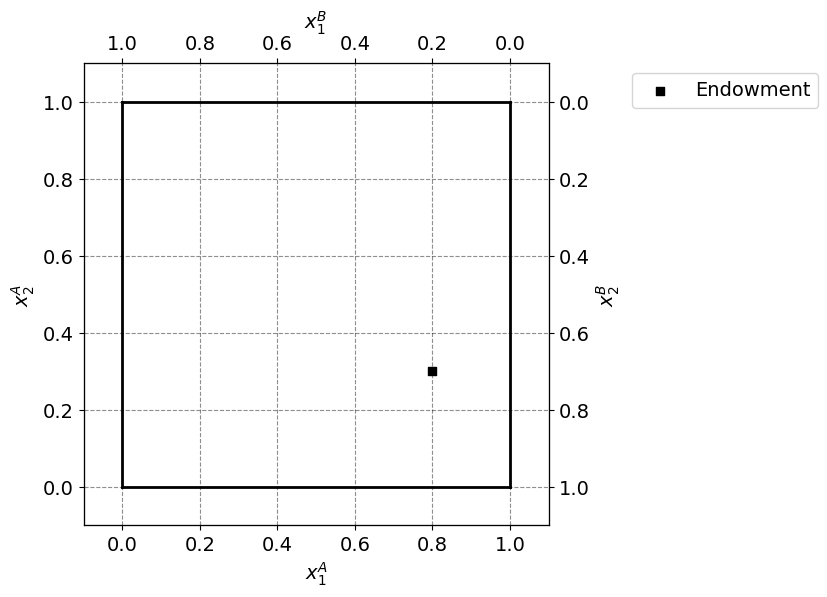

In [115]:
model = ExchangeEconomyClass()
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='Endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

**1.2 Illustrating the consumption sets for pareto improvement**

In the edgeworth box, we plot all the combinations of $x_1^A$ and $x_2^A$ (when $x_1^B$ $\equiv$ $(1-x_1^A)$ and $x_2^B$ is $\equiv$ $(1-x_2^A)$) that yield a pareto improvement in utility from the starting point of A and B consuming their respective endowments. We do this by creating a nested loop over all N values of $x_1^A$ and $x_2^A$ in {$0, \frac{1}{N}, \frac{2}{N},..,N$} and adding them pairwise to a list if they satisfy both of the following conditions conditions:

$$\begin{aligned} 
u^A(x_1^A,x_2^A)≥u^A(\omega_1^A,\omega_2^A)\\
u^B(x_1^B,x_2^B)≥u^B(\omega_1^B,\omega_3^B)
\end{aligned}$$

Then, we introduce the value-pairs to the edgeworth box, marked as "Pareto improvements".


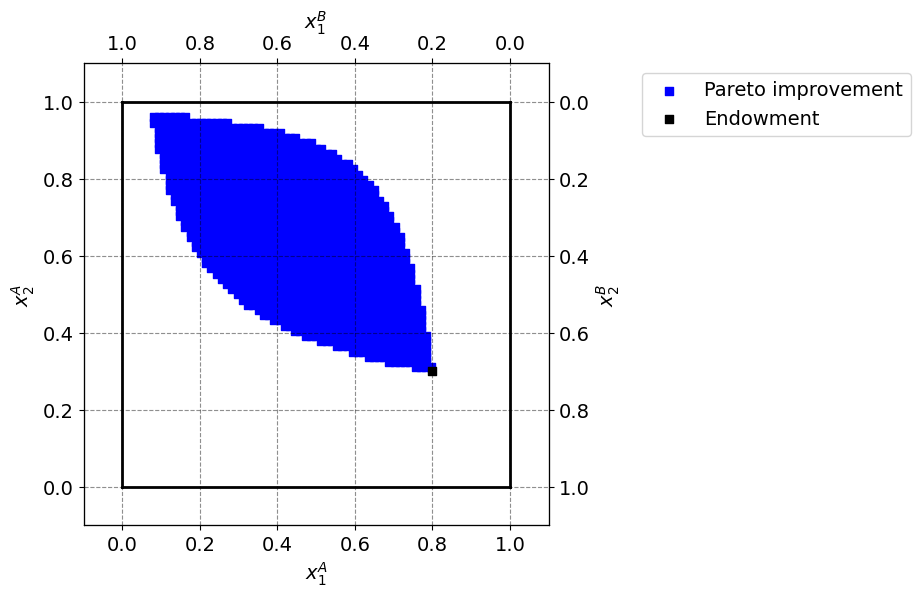

In [116]:
pareto_pairs = model.pareto_improvement()

x1A_values = [pair[0] for pair in pareto_pairs]
x2A_values = [pair[1] for pair in pareto_pairs]

fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

ax_A.scatter(x1A_values, x2A_values,marker='s',color='blue',label='Pareto improvement')
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='Endowment')

ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.8,1.0));

## <a id='toc2_'></a>[Question 2: Market Clearing Error](#toc2_)

**2.1 Plotting market clearing errors**

To calculate the market clearing errors for $p_1$ $\in$ $\mathcal{P}_1$ = {$0.5, 0.5+2\frac{1}{N},0.5+2\frac{2}{N},...,2.5$}, we loop over the values and save the errors as two separate lists.
Then, we plot each of them against the value os $p_1$ to give an overview of the errors.

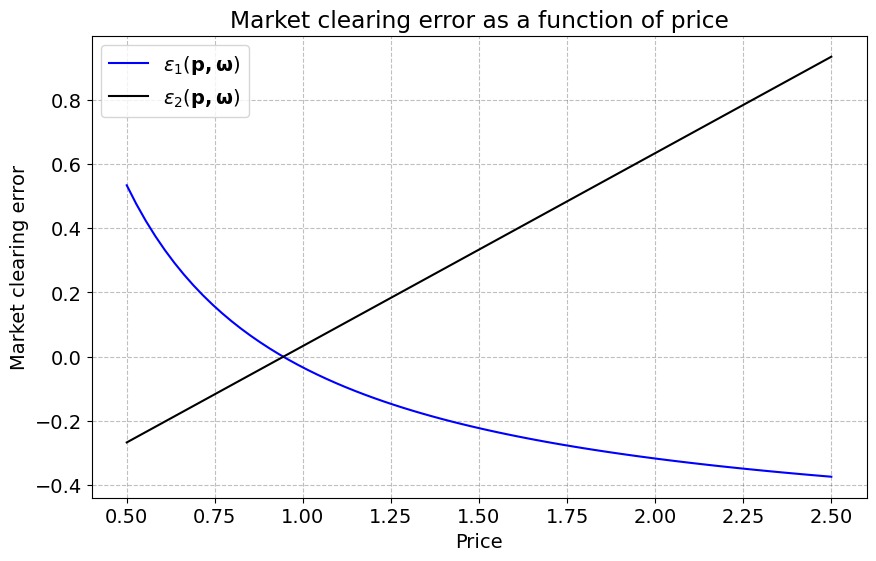

In [117]:
#We calculate the values of epsilon_1 and epsilon_2 for the values of p1 in the vector.
eps1_values, eps2_values = model.market_clearing_error()

#Now, we plot the values we just found
fig = plt.figure(figsize=(10,6), dpi=100)
ax = fig.add_subplot(1,1,1)
ax.plot(np.linspace(0.5,2.5,75), eps1_values, label='$\epsilon_1(\mathbf{p,\omega})$', color='blue')
ax.plot(np.linspace(0.5,2.5,75), eps2_values, label='$\epsilon_2(\mathbf{p,\omega})$', color='black')
ax.grid('true')
ax.legend(frameon=True,loc='upper left')
ax.set_xlabel('Price')
ax.set_ylabel('Market clearing error')
ax.set_title('Market clearing error as a function of price')
plt.show()

$\varepsilon_1$ is decreasing in price, whereas $\varepsilon_2$ is linearly increasing in price. The figure shows that there exists a price, $p_1$, that is slightly below 1, where the market clearing errors intersect at 0 - meaning that the markets clear. The figure also illustrates the validity of Walras' law: when one market clears, the other does too. We see this because both of the errors are 0 for the same price, which is why knowing that one error is 0 is sufficient to conclude tht the markets clear.

## <a id='toc3_'></a>[Question 3: Market Clearing Price](#toc3_)

**3.1 Finding the Market Clearing Price**

In order to find the market clearing price, we need to obtain a value of $p_1$ where $\varepsilon_1$ is equal to 0. Since Walras' law applies, this - by definition - means that $\varepsilon_2$ is also 0, and the market clears.

We assumed that the exercise called for a value of $p_1$ within $\mathcal{P}_1$. Therefore, we realized that our value would not necessarily be exactly equal to 0, but rather an approximation. Thus, we set our tolerance at 0.009, getting the value within $\mathcal{P}_1$ that yields the market clearing error CLOSEST to zero. If we didn't have a tolerance and were restricted to discrete values within $\mathcal{P}_1$, we would find that there exists no point where $p_1$ clears the market. However, if we loosened on the assumption that the exercise called for a value of $p_1$ within $\mathcal{P}_1$, we would be able to use a root-finder.

Now, we find the single value of $p_1$ in $\mathcal{P}_1$ where our condition holds; we loop over the values and, given our tolerance, find the point where $\varepsilon_1=0$. This gives us the approximate market clearing price.

In [118]:
market_clearing_price = model.market_clearing_price()[0]
eps1, eps2 = model.check_market_clearing(p1=market_clearing_price)

print(f'The approximate market clearing price is {market_clearing_price:.3f}, giving a market clearing error of {eps1:.3f} for the first good and {eps2:.3f} for the second good.\nAlthough this price does not clear the market exactly, it is the value in the vector that yields the market clearing error closest to zero.')

The approximate market clearing price is 0.932, giving a market clearing error of 0.008 for the first good and -0.007 for the second good.
Although this price does not clear the market exactly, it is the value in the vector that yields the market clearing error closest to zero.


## <a id='toc4_'></a>[Question 4: A as Price Setter](#toc4_)

For the following two questios, we assume that consumer A can choose a price to maximize her own utility.

**4.1 When choosing a price $p_1$ wihtin $\mathcal{P}_1$**

Consumer A is looking to maximize her own utility at a price $p_1$, given the distribution of endowment between her and consumer B. She is thus looking to maximize:
$$\max_{p_1 \in \mathcal{P}_1} u^A(1-x^B_1(\mathbf{p},\mathbf{\omega^B}), 1-x^B_2(\mathbf{p},\mathbf{\omega^B}))$$

Since we are looking to find the optimal price in a discrete amount, we utilize a grid-search.

In [119]:
opt_vals = model.price_setter_1()
print(f'When only allowed prices within P1, consumer A would choose price p1 = {opt_vals[0]:.3f}, and get utility {opt_vals[1]:.3f}.\nConsumer B would get utility {model.utility_B(1-opt_vals[2],1-opt_vals[3]):.3f}\nThis corresponds to consumer A and B respectively consuming the followinng quantity bundles:\n(x1A,x2A) = ({opt_vals[2]:.3f},{opt_vals[3]:.3f}), (x1B,x2B) = ({1-opt_vals[2]:.3f},{1-opt_vals[3]:.3f})')

When only allowed prices within P1, consumer A would choose price p1 = 1.905, and get utility 0.634.
Consumer B would get utility 0.372
This corresponds to consumer A and B respectively consuming the followinng quantity bundles:
(x1A,x2A) = (0.622,0.640), (x1B,x2B) = (0.378,0.360)


In [138]:
print(opt_vals)

(1.9054054054054055, 0.6336197517392991, 0.6217494089834517, 0.6396396396396397)


**4.2 When choosing any price $p_1>0$**

Consumer A can now freely choose any positive value of $p_1$ to maximize her own utility given the distribution of endowments between her and consumer B. She is thus looking to maximize:

$$\max_{p_1>0} u^A(1-x^B_1(\mathbf{p},\mathbf{\omega^B}), 1-x^B_2(\mathbf{p},\mathbf{\omega^B}))$$

Since we are now looking for any positive value of $p_1$, we are looking at a continous maximization problem and will therefore be calling a solver using SciPy optimize. 


In [120]:
opt_price = model.price_setter_2()
x1B,x2B = model.demand_B(opt_price)
utility_A = model.utility_A(1-x1B,1-x2B)
utility_B = model.utility_B(x1B,x2B)

print(f'When allowed all positive prices, consumer A would  choose price p_1 = {opt_price:.3f} and get utility {utility_A:.3f}.\nConsumer B would get utility {utility_B:.3f}\nThis corresponds to consumer A and B respectively consuming the following quantity bundles:\n(x1A,x2A) = ({1-x1B:.3f},{1-x2B:.3f}), (x1B,x2B) = ({x1B:.3f},{x2B:.3f})')

When allowed all positive prices, consumer A would  choose price p_1 = 1.899 and get utility 0.634.
Consumer B would get utility 0.373
This corresponds to consumer A and B respectively consuming the following quantity bundles:
(x1A,x2A) = (0.621,0.640), (x1B,x2B) = (0.379,0.360)


## <a id='toc5_'></a>[Question 5: A as Market Maker](#toc5_)

For the following two questions, we now assume that consumer A chooses consumer B's consumption, but such that consumer B is not worse of than with their initial endowments. 

**5.1 Choosing consumption restricted to $\mathcal{C}$**

Consumer A's choice is first restricted to $\mathcal{C}$ and is thus looking to maximize:
$$\max_{(x_1^A,x_2^A) \in \mathcal{C}} u^A(x_1^A,x_2^A)$$

Like in question 4.1, as this is a discrete set of possible allocations, we loop through the possibilites. 


In [121]:
max_utility = -np.inf # initial guess

# We use the values from model.par - this will make our code mode robust
initial_utilityB = model.utility_B(1-model.par.w1A,1-model.par.w2A)
initial_utilityA = model.utility_A(model.par.w1A,model.par.w2A)

allocationA = (None,None)
x1A_vec = np.linspace(0,1,N)
x2A_vec = np.linspace(0,1,N)

for x1A in x1A_vec:
    for x2A in x2A_vec:
        utility_nowA = model.utility_A(x1A,x2A)
        utility_nowB = model.utility_B(1-x1A,1-x2A)
        if utility_nowA > max_utility and utility_nowB >= initial_utilityB:
            max_utility = utility_nowA
            allocationA = (x1A,x2A)

utilityB = model.utility_B(1-allocationA[0],1-allocationA[1])

np.set_printoptions(precision=3)
print(f'Consumer As initial endowment was (x1A,x2A) = (0.8,0.3) and her utility was {initial_utilityA:.3f}')
print(f'Consumer Bs initial endowment was (x1B,x2B) = (0.2,0.7) and her utility was {initial_utilityB:.3f}')
print(f'Consumer A would choose consumption (x1A,x2A) = ({allocationA[0]:.3f},{allocationA[1]:.3f}) and would get utility {max_utility:.3f}')
print(f'Consumer B would have consumption (x1B,x2B) = ({1-allocationA[0]:.3f},{1-allocationA[1]:.3f}) and would get utility {utilityB:.3f}')


Consumer As initial endowment was (x1A,x2A) = (0.8,0.3) and her utility was 0.416
Consumer Bs initial endowment was (x1B,x2B) = (0.2,0.7) and her utility was 0.304
Consumer A would choose consumption (x1A,x2A) = (0.581,0.838) and would get utility 0.742
Consumer B would have consumption (x1B,x2B) = (0.419,0.162) and would get utility 0.305


**5.2 Choosing consumption with no further restrictions**

Consumer A can now choose any allocation and is thus looking to maximize:
$$\max_{(x_1^A,x_2^A)\in[0,1]*[0,1]} u^A(x_1^A,x_2^A)\\
s.t.  u^B(1-x_1^A,1-x_2^A)≥u^B(\omega_1^B,\omega_2^B)$$

Like in 4.2, consumer A can now choose freely and we therefor use the SciPy optimizer for this.

In [122]:
bounds = [(0,1)]
constraints = {'type':'ineq', 'fun':lambda x: model.utility_B(1-x[0],1-x[1]) - initial_utilityB}
initial_guess = [1]

sol = optimize.minimize(model.market_maker,initial_guess,method='SLSQP',bounds=bounds,constraints=constraints)

# unpacking the solution
x1A,x2A = model.demand_A(sol.x)
utilityA = model.utility_A(x1A,x2A)
utilityB = model.utility_B(1-x1A,1-x2A)

np.set_printoptions(precision=3)
print(f'Consumer As initial endowment was (x1A,x2A) = (0.8,0.3) and her utility was {initial_utilityA:.3f}')
print(f'Consumer Bs initial endowment was (x1B,x2B) = (0.2,0.7) and her utility was {initial_utilityB:.3f}')
print(f'Consumer A would choose consumption (x1A,x2A) = ({x1A},{x2A}) and would get utility {utilityA}')
print(f'Consumer B would have consumption (x1B,x2B) = ({1-x1A},{1-x2A}) and would get utility {utilityB}')

IndexError: index 1 is out of bounds for axis 0 with size 1

## <a id='toc6_'></a>[Question 6: Utilitarian Social Planner](#toc6_)

**6.1 Utilitarian Social Planners best allocation**

To find the best allocation we need to define the new function and set some constraints which ensure that both x_1A and x_2A do not exceed 1, but neither do they become less than 0.

In addition, we come up with a guess at x0, after which we use the optimize.minimize function to find the best allocation.

In [127]:
optimal_allocation = model.utilitarian_planner()
print(f'The utilitarian social planer allocated the followinng consumption bundle to consumer A:\n(x1A, x2A) = ({optimal_allocation[0]:.3f},{optimal_allocation[1]:.3f})\nThis results in consumer B getting the following:\n(x1B,x2B) = ({1-optimal_allocation[0]:.3f},{1-optimal_allocation[1]:.3f})')
print(f'This results in a total utility of {model.utility_A(optimal_allocation[0],optimal_allocation[1]) + model.utility_B(1-optimal_allocation[0],1-optimal_allocation[1]):.3f}')

The utilitarian social planer allocated the followinng consumption bundle to consumer A:
(x1A, x2A) = (0.333,0.667)
This results in consumer B getting the following:
(x1B,x2B) = (0.667,0.333)
This results in a total utility of 1.058


**6.2 Illustrate and compare with your results in question 3-5**

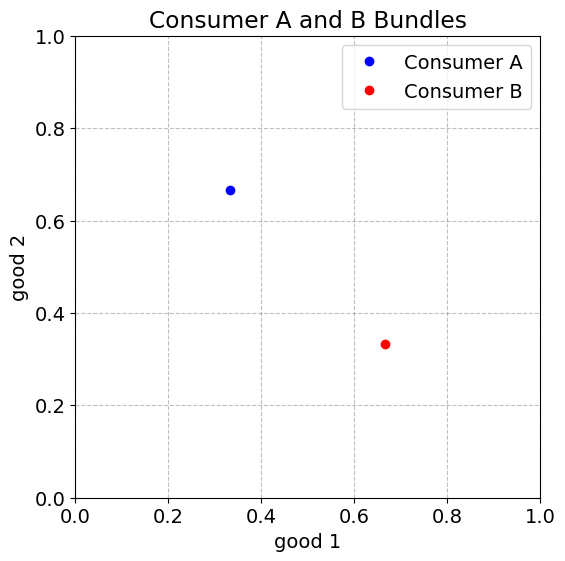

In [130]:
x1A, x2A = optimal_allocation
x1B, x2B = 1 - x1A, 1 - x2A

plt.figure(figsize=(6, 6))
plt.plot([x1A], [x2A], 'bo', label='Consumer A')
plt.plot([x1B], [x2B], 'ro', label='Consumer B')
plt.xlabel('good 1')
plt.ylabel('good 2')
plt.title('Consumer A and B Bundles')
plt.legend()
plt.grid(True)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()


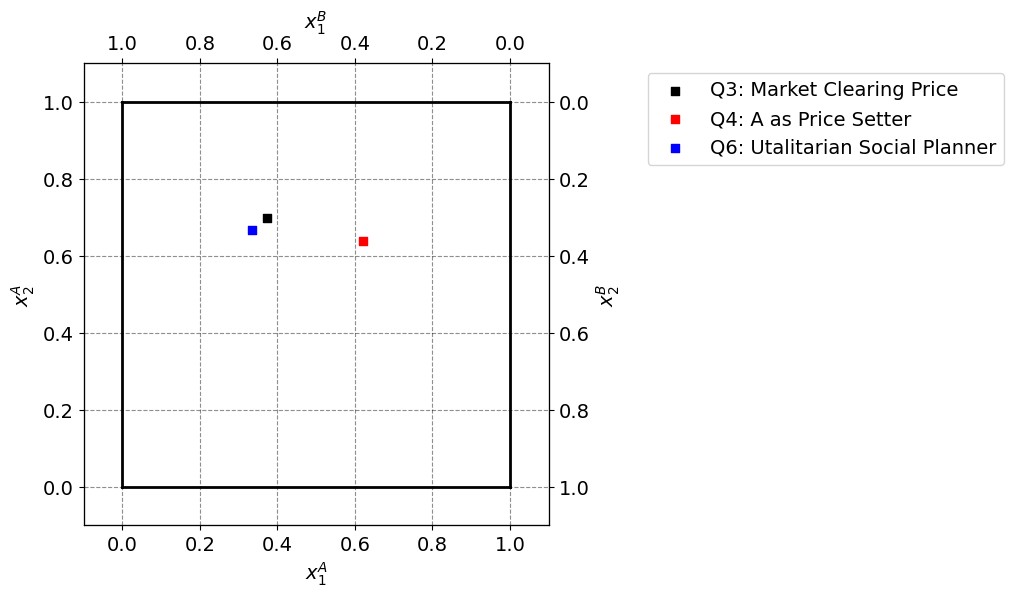

In [142]:
# a. defining the bundles from questions 3-5
x1A_3, x2A_3 = model.demand_A(market_clearing_price)
x1A_4, x2A_4 = opt_vals[2], opt_vals[3]
# HER SKAL SKRIVES RESULTATER FRA 5.1
# HER SKAL SKRIVES RESULTATER FRA 5.2
x1A_6, x2A_6 = optimal_allocation

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# c. plot the bundles
ax_A.scatter(x1A_3,x2A_3, marker='s',color='black',label='Q3: Market Clearing Price')
ax_A.scatter(x1A_4,x2A_4, marker='s',color='red',label='Q4: A as Price Setter')
#HER SKAL LAVES SCATTEER PÅ PRÆCIS SAMME MÅDE MED RESULTATER FRA 5.1 OG 5.2
ax_A.scatter(x1A_6,x2A_6, marker='s',color='blue',label='Q6: Utalitarian Social Planner')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(2.0,1.0));

## <a id='toc7_'></a>[Question 7: Random Draw](#toc7_)

**7.1 Drawing the set $\mathcal{W}$ with 50 elements**

We draw 50 random values of $\omega_1^A$ and 50 random values of $\omega_2^A$.\
Then, we pair them together in a numpy array, our $\mathcal{W}$ and print out the first five elements of the set to illustrate.

In [ ]:
np.random.seed(2000)
w1A = np.random.uniform(low=0, high=1, size=50)
w2A = np.random.uniform(low=0, high=1, size=50)

W = np.column_stack((w1A,w2A))
print(f'The first five elements of the set are:\n\
({W[0][0]:.3f}, {W[0][1]:.3f})\n\
({W[1][0]:.3f}, {W[1][1]:.3f})\n\
({W[2][0]:.3f}, {W[2][1]:.3f})\n\
({W[4][0]:.3f}, {W[4][1]:.3f})')


## <a id='toc8_'></a>[Question 8: Market Equilibrium](#toc8_)

We find the market equilibrium allocations by optimizing the consumption set C. This can be done by setting up constraints, give an initial guess on both goods and optimizing the function.

In [ ]:
x1, x2 = model.market_equilibrium_allocation8()

print("Market equilibrium allocation for consumer A:")
print(f"x1 = {x1:.3f}")
print(f"x2 = {x2:.3f}")

x1A, x2A = x1, x2
x1B = 1 - x1A
x2B = 1 - x2A

plt.figure(figsize=(6, 6))
plt.scatter(x1A, x2A, color='green', label='consumer A')
plt.scatter(x1B, x2B, color='orange', label='consumer B')
plt.xlabel('Good 1')
plt.ylabel('Good 2')
plt.title('Edgeworth Box with Market Equilibrium Allocation for Consumer A')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()